# Stock Analysis and Trading Bot Using Python

This repository contains a Python-based stock analysis and trading bot. It fetches historical stock data, calculates technical indicators, and performs backtesting using the `backtrader` library. Additionally, it demonstrates how to connect to the Alpaca API for placing real-time trades.

## Features
- Fetches stock data using the Yahoo Finance API (`yfinance`).
- Calculates key technical indicators such as:
  - Simple Moving Averages (SMA)
  - Relative Strength Index (RSI)
- Backtests a basic moving average crossover strategy.
- Implements an automated trading strategy with Alpaca API (Paper trading).

## Requirements
- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `yfinance`
- `ta`
- `backtrader`
- `alpaca-trade-api`

You can install all required libraries using:


In [ ]:
pip install numpy pandas matplotlib seaborn yfinance requests ta backtrader

# Step 1: Fetching Historical Stock Data Using Yahoo Finance

The first step is to fetch the historical stock data for a given stock ticker. In this example, we will use "AAPL" (Apple) as the ticker.

In [1]:
import yfinance as yf

# Get historical stock data
ticker = "AAPL"
stock = yf.Ticker(ticker)
data = stock.history(period="2y")  # 2 year of data

print(data.head())


                                 Open        High         Low       Close  \
Date                                                                        
2023-03-13 00:00:00-04:00  146.334236  151.611022  146.225334  148.967682   
2023-03-14 00:00:00-04:00  149.769595  151.868423  148.601383  151.066513   
2023-03-15 00:00:00-04:00  149.680508  151.719938  148.423184  151.462540   
2023-03-16 00:00:00-04:00  150.640830  154.897901  150.126017  154.293991   
2023-03-17 00:00:00-04:00  154.521688  155.175102  152.739656  153.452469   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-03-13 00:00:00-04:00  84457100        0.0           0.0  
2023-03-14 00:00:00-04:00  73695900        0.0           0.0  
2023-03-15 00:00:00-04:00  77167900        0.0           0.0  
2023-03-16 00:00:00-04:00  76161100        0.0           0.0  
2023-03-17 00:00:00-04:00  98944600        0.0           0.0  


# Step 2: Plotting the Stock’s Closing Price

We can visualize the stock price data using matplotlib.

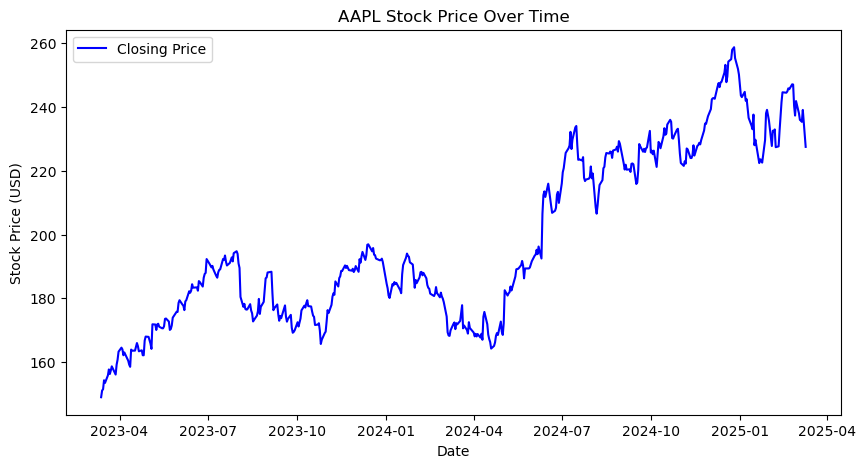

In [2]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="Closing Price", color='blue')

# Add labels and title
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()

# Show the plot
plt.show()


# Step 3: Adding Simple Moving Averages (SMA)

Next, we calculate and plot two Simple Moving Averages (50-day and 200-day) on the stock's closing price.

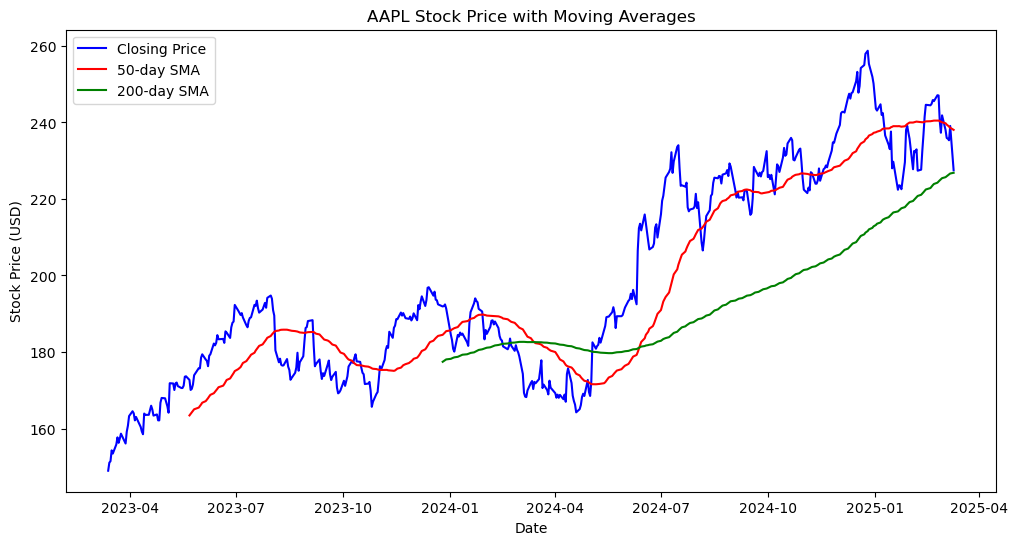

In [3]:
# Calculate moving averages
data['SMA50'] = data['Close'].rolling(50).mean()  # 50-day Simple Moving Average
data['SMA200'] = data['Close'].rolling(200).mean()  # 200-day Simple Moving Average

# Plot the stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color='blue')
plt.plot(data['SMA50'], label="50-day SMA", color='red')
plt.plot(data['SMA200'], label="200-day SMA", color='green')

# Add title and labels
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()

# Show the plot
plt.show()


# Step 4: Calculating the Relative Strength Index (RSI)

The RSI is a momentum indicator used to measure whether a stock is overbought (>70) or oversold (<30).

                                Close        RSI
Date                                            
2025-03-04 00:00:00-05:00  235.929993  45.885176
2025-03-05 00:00:00-05:00  235.740005  45.649990
2025-03-06 00:00:00-05:00  235.330002  45.112604
2025-03-07 00:00:00-05:00  239.070007  50.801949
2025-03-10 00:00:00-04:00  227.479996  37.744918


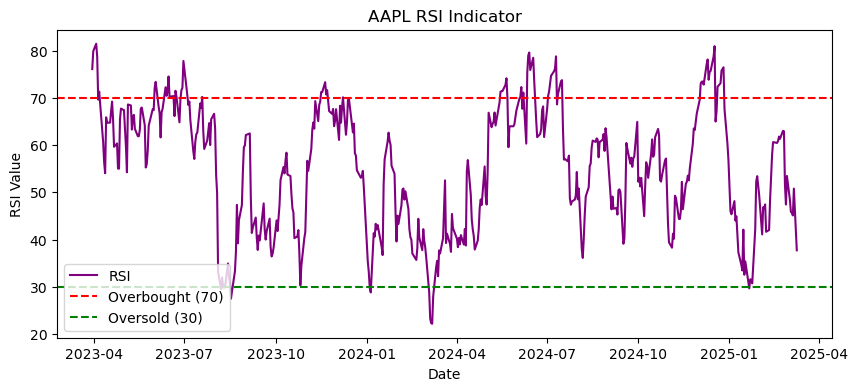

In [4]:
import ta  # Import technical analysis library

# Calculate RSI (Relative Strength Index)
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
print(data[['Close', 'RSI']].tail()) 

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data['RSI'], label="RSI", color='purple')

# Add overbought and oversold lines
plt.axhline(70, linestyle='--', color='red', label="Overbought (70)")
plt.axhline(30, linestyle='--', color='green', label="Oversold (30)")

# Add title and labels
plt.title(f"{ticker} RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()

# Show the plot
plt.show()


# Step 5: Backtesting the Moving Average Crossover Strategy

We'll use backtrader to test a moving average crossover strategy:

Buy when the 50-day SMA crosses above the 200-day SMA.
Sell when the 50-day SMA crosses below the 200-day SMA.


<IPython.core.display.Javascript object>


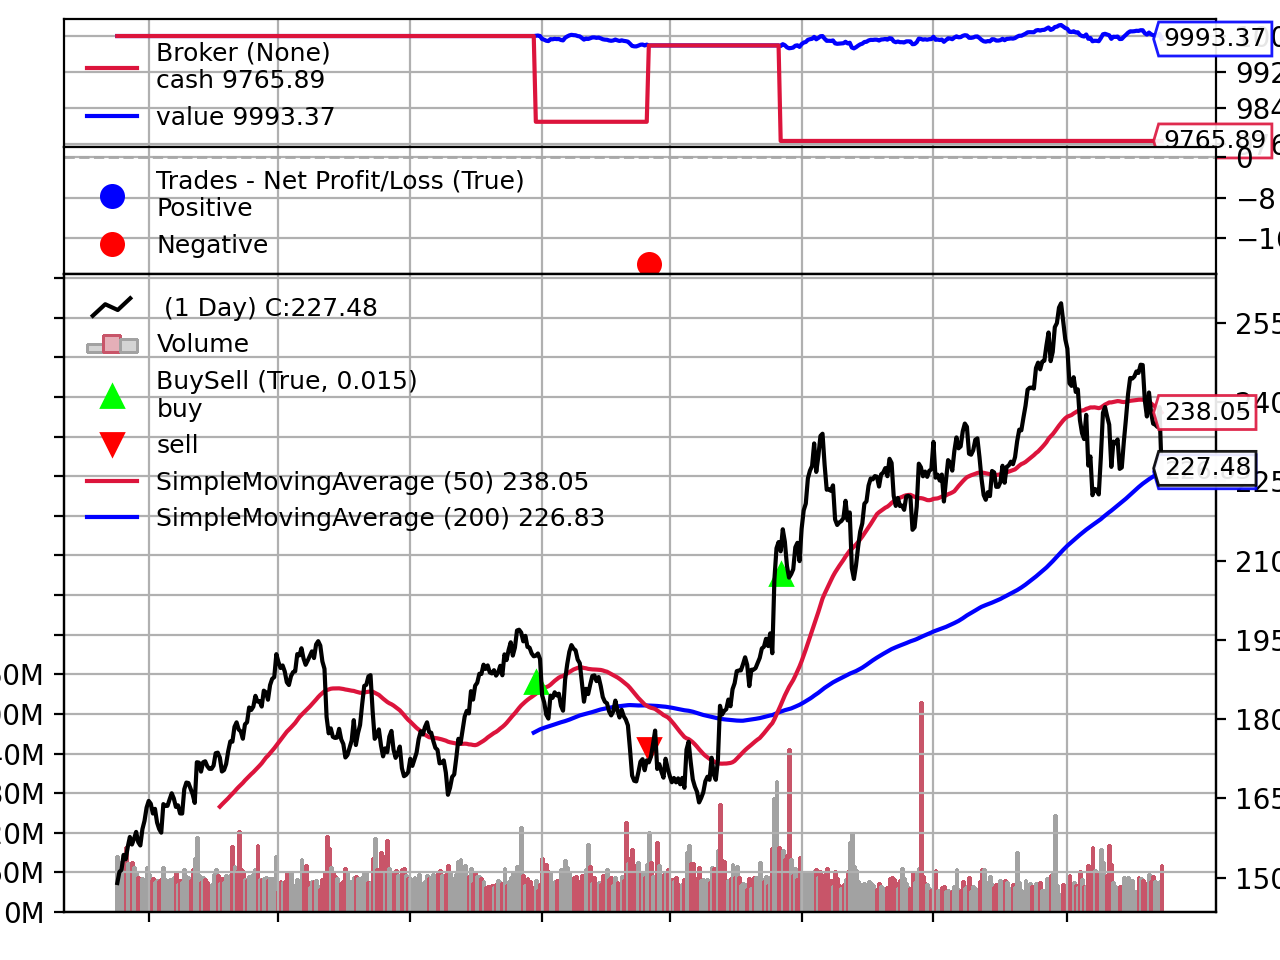

[[<Figure size 640x480 with 4 Axes>]]

In [5]:
import backtrader as bt  # Import Backtrader for backtesting

# Define the strategy
class SmaCross(bt.Strategy):
    def __init__(self):
        self.sma50 = bt.indicators.SimpleMovingAverage(self.data.close, period=50)
        self.sma200 = bt.indicators.SimpleMovingAverage(self.data.close, period=200)

    def next(self):
        if self.sma50[0] > self.sma200[0] and self.position.size == 0:
            self.buy()  # Buy if 50-day SMA crosses above 200-day SMA
        elif self.sma50[0] < self.sma200[0] and self.position.size > 0:
            self.sell()  # Sell if 50-day SMA crosses below 200-day SMA

# Set up the backtesting environment
cerebro = bt.Cerebro()
datafeed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(datafeed)
cerebro.addstrategy(SmaCross)

# Run the backtest
cerebro.run()
cerebro.plot()


# Step 6: Automating Trades with the Alpaca API

Finally, you can place real-time trades using the Alpaca API (paper trading). Make sure to replace the placeholders for the API keys with your actual credentials from Alpaca.

In [ ]:
import alpaca_trade_api as tradeapi  # Import Alpaca API

# Define API keys (Sign up at https://alpaca.markets/)
API_KEY = "your_api_key"
SECRET_KEY = "your_secret_key"
BASE_URL = "https://paper-api.alpaca.markets"  # Use paper trading for testing

# Connect to Alpaca API
api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL)

# Place a market buy order
api.submit_order(
    symbol="AAPL",
    qty=1,
    side="buy",
    type="market",
    time_in_force="gtc"
)

print("Buy order placed for 1 share of AAPL")